<h1>Analysis of Beorn D2 chip: IV curves</h1>


In [2]:
sample_name = 'beorn_d2'                    # name of the chip in the fridge
db_name = '20220620_sc-ncr_chip_characterisation.db'   # name of the database
user = 'sc'                               # who is performing measurements

<h3>Basic imports</h3>

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from resonator_tools import circuit

import qcodes as qc
from qcodes import initialise_database, load_by_run_spec
from qcodes.dataset.plotting import plot_by_id

import scipy.optimize

db_path  = os.path.join(r'D:\QMET' + '\\' + sample_name + '\\', db_name)

<h2>Data loading</h2>

In [4]:
RUN_ID = 41
qc.initialise_or_create_database_at(db_path)
dataset = qc.load_by_run_spec( captured_run_id=RUN_ID)
print(dataset)

ivf_dict = dataset.to_pandas_dataframe_dict()

#plt.plot(f, phi)

iv_pm05mV_phimp7ma_4001pts_50avg #41@D:\QMET\beorn_d2\20220620_sc-ncr_chip_characterisation.db
----------------------------------------------------------------------------------------------
current_source_current - numeric
adwin_input_2_voltage_up - numeric
adwin_input_2_voltage_down - numeric
adwin_up_ramp - numeric
adwin_down_ramp - numeric


In [5]:
# IV
# up ramp
ivf_up_0 = ivf_dict['adwin_up_ramp']
ivf_up_1 = ivf_up_0.reset_index()
v_up = ivf_up_1['adwin_input_2_voltage_up'].to_numpy()
i_up = ivf_up_1['adwin_up_ramp'].to_numpy()

i_flux_up = ivf_up_1['current_source_current'].to_numpy()

# down ramp
ivf_down_0 = ivf_dict['adwin_down_ramp']
ivf_down_1 = ivf_down_0.reset_index()
v_down = ivf_down_1['adwin_input_2_voltage_down'].to_numpy()
i_down = ivf_down_1['adwin_down_ramp'].to_numpy()

i_flux_down = ivf_down_1['current_source_current'].to_numpy()


In [6]:
N = np.unique(i_flux_up).shape[0]
size = (N,-1)

v_up = np.reshape(v_up,size)
i_up = np.reshape(i_up, size)
i_flux_up = np.reshape(i_flux_up, size)


Text(0, 0.5, 'I')

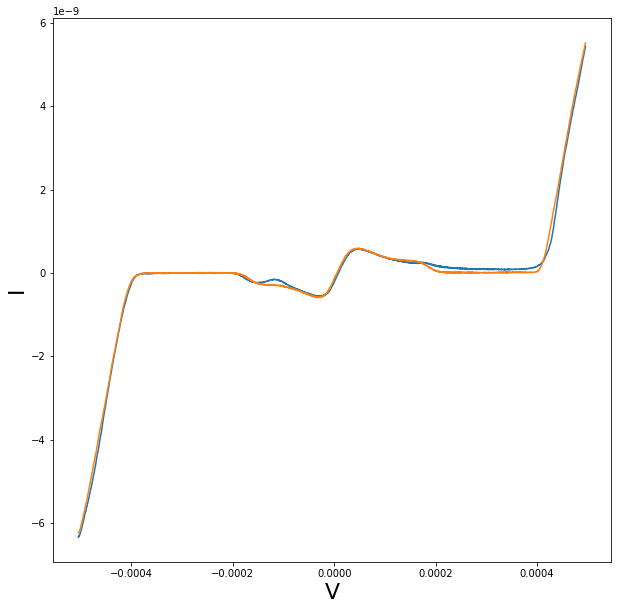

In [7]:
plt.figure(figsize=(10,10))
k=200
plt.plot(v_up[k, :],i_up[k, :]*0.1)

k=250
plt.plot(v_up[k, :],i_up[k, :]*0.1)

plt.xlabel("V", fontsize=22)
plt.ylabel("I", fontsize=22)


Text(0, 0.5, 'V')

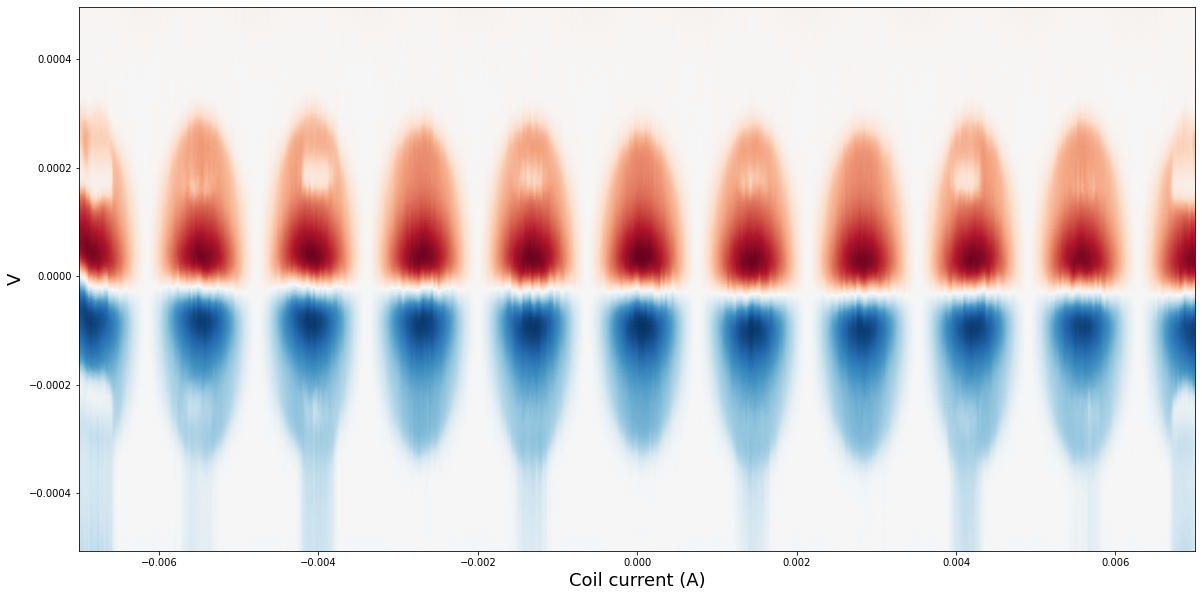

In [8]:
plt.figure(figsize=(20,10))
plt.imshow(np.transpose(i_up[:, 500:2000]),  aspect='auto', cmap='RdBu',
           extent = [np.min(i_flux_up), np.max(i_flux_up), np.min(v_up), np.max(v_up) ] )
plt.xlabel("Coil current (A)", fontsize=18)
plt.ylabel("V", fontsize=18)

C:\Users\NICOLA~1.ROC\AppData\Local\Temp/ipykernel_18044/620280550.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.transpose(np.log10(np.abs(i_up))[:, :]),  aspect='auto', cmap='RdBu',


Text(0, 0.5, 'V')

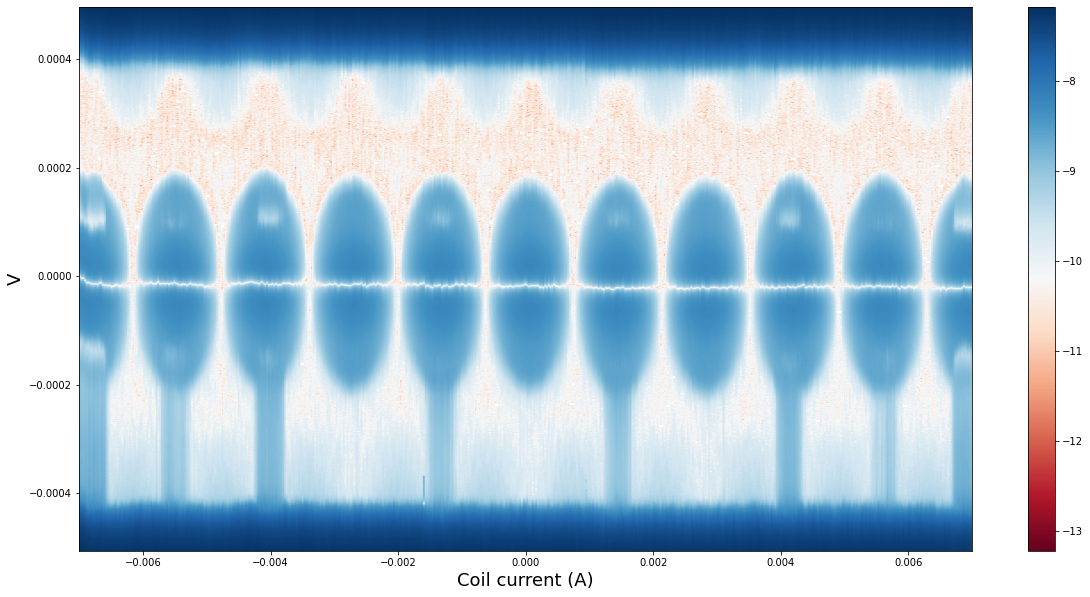

In [12]:
plt.figure(figsize=(20,10))
plt.imshow(np.transpose(np.log10(np.abs(i_up))[:, :]),  aspect='auto', cmap='RdBu',
           extent = [np.min(i_flux_up), np.max(i_flux_up), np.min(v_up), np.max(v_up) ] )
plt.xlabel("Coil current (A)", fontsize=18)
plt.colorbar()
plt.ylabel("V", fontsize=18)

In [9]:
dIdv_up = np.gradient(i_up*0.1, v_up[0,1] - v_up[0,0], axis=1)

Text(0, 0.5, 'dIdV')

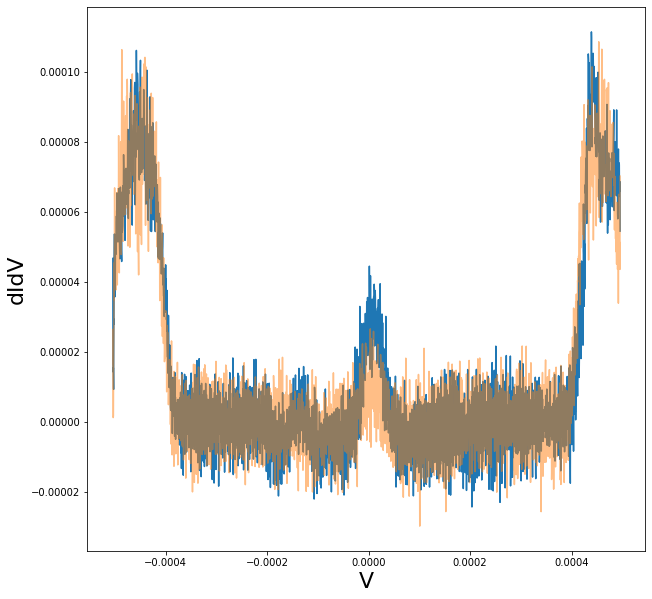

In [11]:
plt.figure(figsize=(10,10))
k=200
plt.plot(v_up[k, :],dIdv_up[k, :])

k=220
plt.plot(v_up[k, :],dIdv_up[k, :], alpha=0.5)

plt.xlabel("V", fontsize=22)
plt.ylabel("dIdV", fontsize=22)

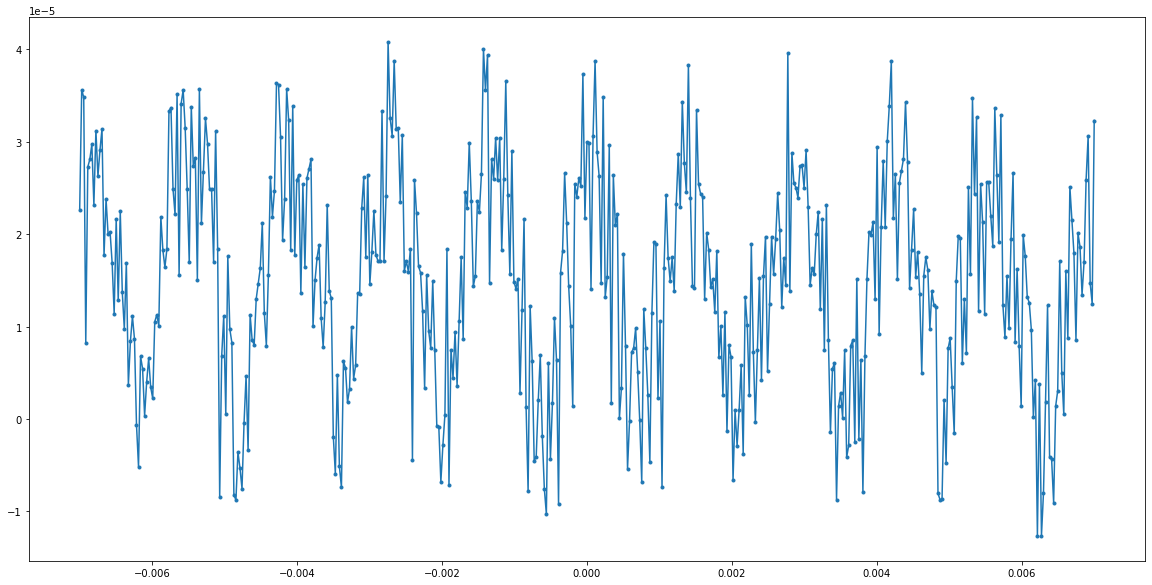

In [12]:
plt.figure(figsize=(20,10))
plt.plot( i_flux_up[:, 1255] ,dIdv_up[:, 1255] , '.-')

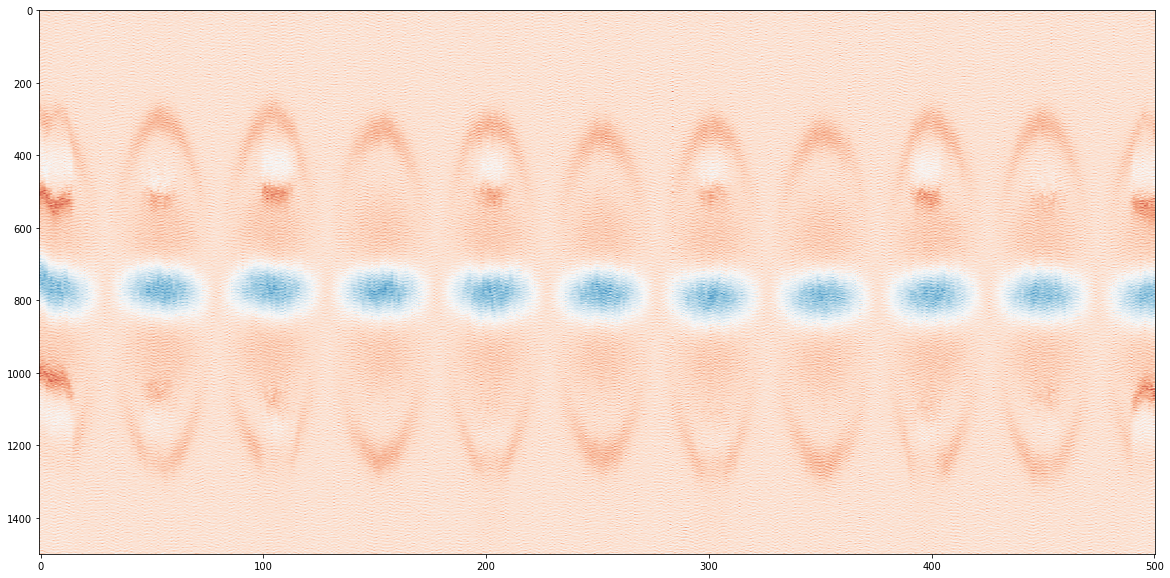

In [13]:
plt.figure(figsize=(20,10))
plt.imshow(np.transpose(dIdv_up[:, 500:2000]),  aspect='auto', cmap='RdBu',)

In [34]:
N = np.unique(i_flux_down).shape[0]
size = (N,-1)

v_down = np.reshape(v_down,size)
i_down = np.reshape(i_down, size)
i_flux_down = np.reshape(i_flux_down, size)


Text(0, 0.5, 'I')

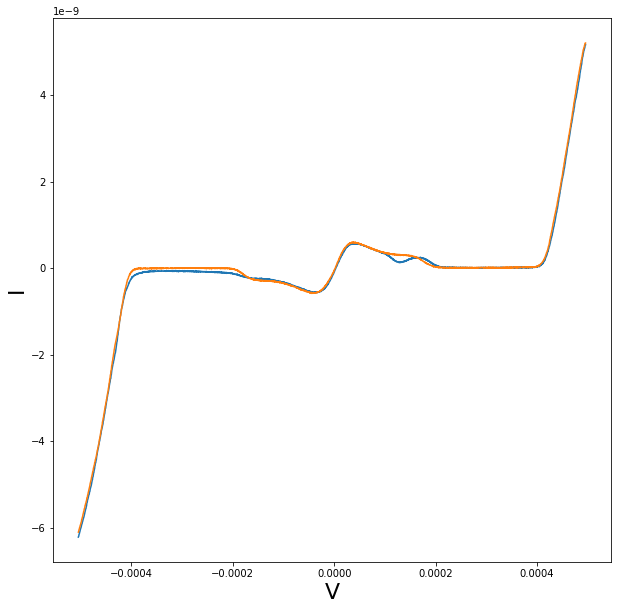

In [35]:
plt.figure(figsize=(10,10))
k=200
plt.plot(v_down[k, :],i_down[k, :]*0.1)

k=250
plt.plot(v_down[k, :],i_down[k, :]*0.1)

plt.xlabel("V", fontsize=22)
plt.ylabel("I", fontsize=22)

Text(0, 0.5, 'V')

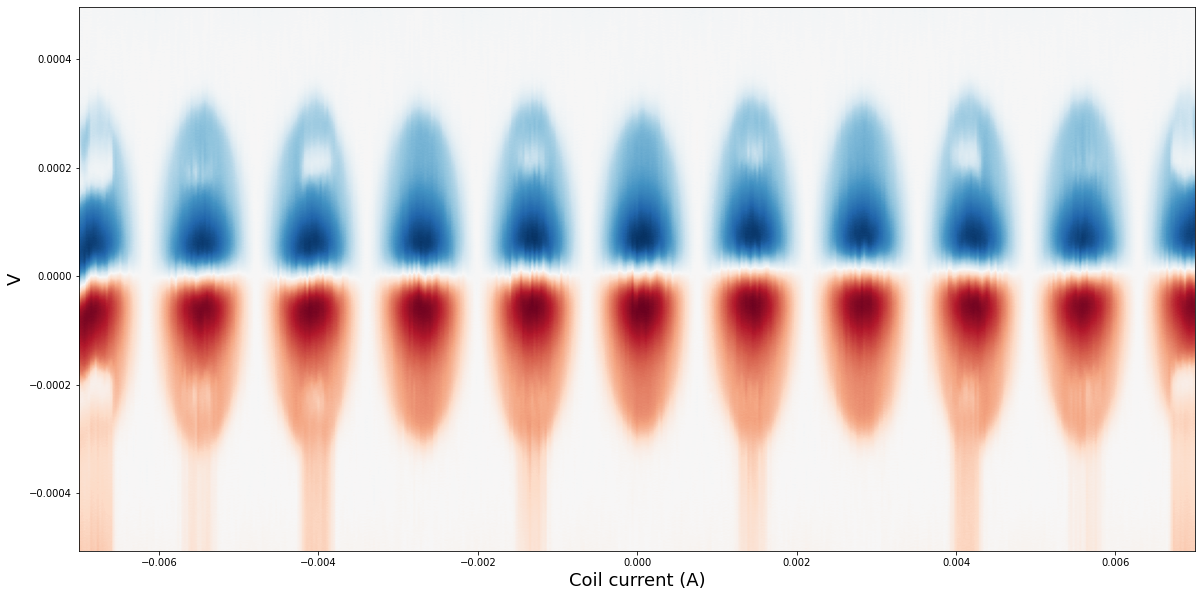

In [48]:
plt.figure(figsize=(20,10))
plt.imshow(np.transpose(i_down[:, 500:2000]),  aspect='auto', cmap='RdBu',
           extent = [np.min(i_flux_down), np.max(i_flux_down), np.min(v_down), np.max(v_down) ] )
plt.xlabel("Coil current (A)", fontsize=18)
plt.ylabel("V", fontsize=18)

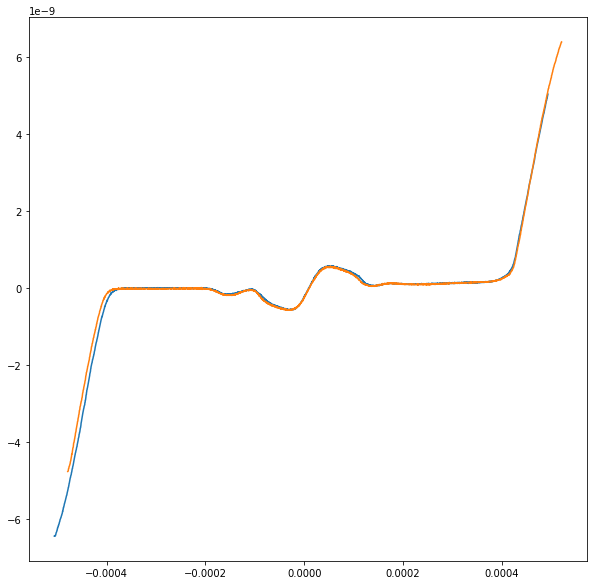

In [47]:
plt.figure(figsize=(10,10))
k=500
plt.plot(v_up[k, :],i_up[k, :]*0.1)

plt.plot(-v_down[k, :]+1.5e-5,-i_down[k, :]*0.1)
